<a href="https://colab.research.google.com/github/mohammedhemed77/DL-Course-UDL-Book-Based-/blob/main/Implementations/Notebooks/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classification CIFAR10 dataset using CNN**
## by Eng / **Mohammed Hemed**

Let’s start by loading some data. We will be using the CIFAR-10 dataset. The dataset has 60,000 color images (RGB) at 32px x 32px belonging to 10 different classes (6000 images/class). The dataset is divided into 50,000 training and 10,000 testing images.

You can see a sample of the dataset along with their classes below:

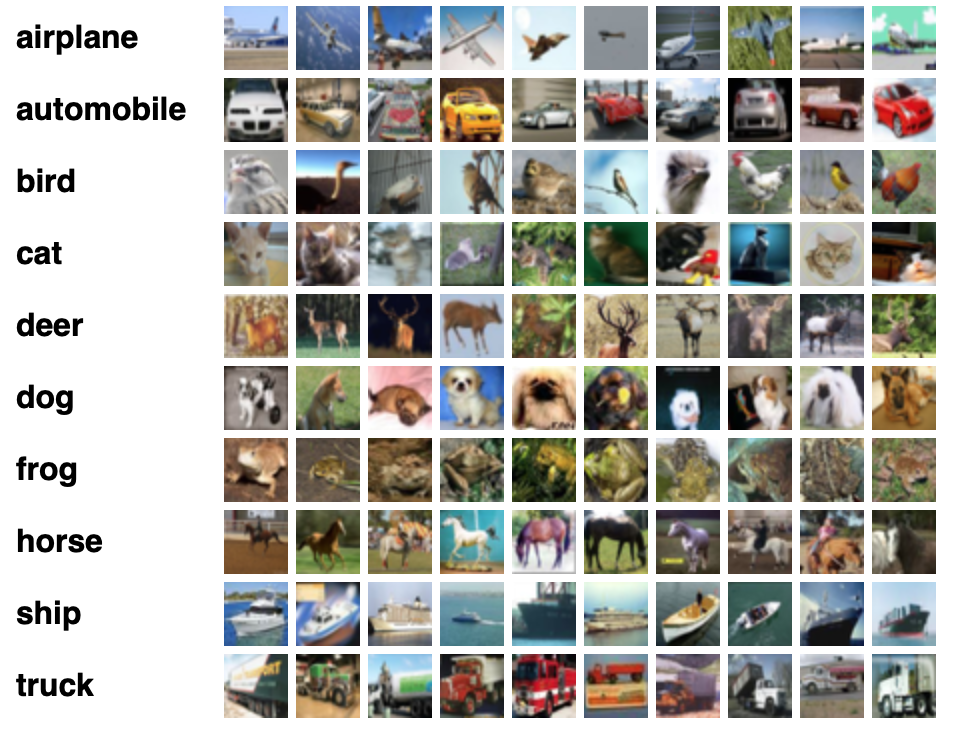

### import libraries

In [1]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Make sure that you are using GPU

In [48]:
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("CUDA Version:", torch.version.cuda)
    print("GPU Memory Info:", torch.cuda.memory_allocated() / 1024**3, "GB")

GPU Name: Tesla T4
CUDA Version: 12.4
GPU Memory Info: 0.045304298400878906 GB


### Download dataset
### Do some useful transformations

In [4]:
# Use transforms.compose method to reformat images for modeling,
# and save to variable all_transforms for later use
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])
# Create Training dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

# Create Testing dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

100%|██████████| 170M/170M [00:10<00:00, 15.9MB/s]


### Design CNN

In [49]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
#  Determine what layers and their order in CNN object
    def __init__(self, num_classes):

        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    # Progresses data across layers
    def forward(self, x):

        #print(f"Input shape: {x.shape}")

        # CONV - RELU
        out = F.relu(self.conv_layer1(out))
        #print(f"After conv1: {out.shape}")

        # CONV - RELU
        out = F.relu(self.conv_layer2(out))
        #print(f"After conv2: {out.shape}")

        # MAX-POOL
        out = self.max_pool1(out)
        #print(f"After max_pool1: {out.shape}")

        # CONV - RELU
        out = F.relu(self.conv_layer3(out))
        #print(f"After conv3: {out.shape}")

        # CONV - RELU
        out = F.relu(self.conv_layer4(out))
        #print(f"After conv4: {out.shape}")

        # MAX-POOL
        out = self.max_pool2(out)
        #print(f"After max_pool1: {out.shape}")

        # flatten the output of volume filter
        out = out.reshape(out.size(0), -1)
        #print(f"After flatten: {out.shape}")

        # FC - RELU
        out = F.relu(self.fc1(out))
        #print(f"After fc1 (output): {out.shape}")  # (batch_size, num_classes)


        out = self.fc2(out)
        #print(f"After fc2 (output): {out.shape}")  # (batch_size, num_classes)


        return out

## Create the Model loss and optimizer

In [44]:
model = ConvNeuralNet(num_classes).to(device)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)

total_step = len(train_loader)

### Train our model

In [45]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
# Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/20], Loss: 2.2607
Epoch [2/20], Loss: 1.5510
Epoch [3/20], Loss: 1.2151
Epoch [4/20], Loss: 1.1469
Epoch [5/20], Loss: 1.2709
Epoch [6/20], Loss: 1.7299
Epoch [7/20], Loss: 1.0997
Epoch [8/20], Loss: 0.8708
Epoch [9/20], Loss: 1.2406
Epoch [10/20], Loss: 1.3965
Epoch [11/20], Loss: 0.9823
Epoch [12/20], Loss: 1.1000
Epoch [13/20], Loss: 1.1067
Epoch [14/20], Loss: 0.6227
Epoch [15/20], Loss: 0.8548
Epoch [16/20], Loss: 1.1600
Epoch [17/20], Loss: 1.5206
Epoch [18/20], Loss: 0.6523
Epoch [19/20], Loss: 0.7509
Epoch [20/20], Loss: 1.1132


### Measure the accuracy

In [31]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the {} train images: {} %'.format(50000, 100 * correct / total))

Accuracy of the network on the 50000 train images: 75.56 %


In [43]:
from torchsummary import summary

model = ConvNeuralNet(num_classes=10).cuda()  # Move to GPU if available
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
              ReLU-2           [-1, 32, 30, 30]               0
            Conv2d-3           [-1, 32, 28, 28]           9,248
              ReLU-4           [-1, 32, 28, 28]               0
         MaxPool2d-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 64, 12, 12]          18,496
              ReLU-7           [-1, 64, 12, 12]               0
            Conv2d-8           [-1, 64, 10, 10]          36,928
              ReLU-9           [-1, 64, 10, 10]               0
        MaxPool2d-10             [-1, 64, 5, 5]               0
           Linear-11                  [-1, 128]         204,928
             ReLU-12                  [-1, 128]               0
           Linear-13                   [-1, 10]           1,290
Total params: 271,786
Trainable params:

### Sources

[**CS231n Convolutional Neural Networks for Visual Recognition**](https://cs231n.github.io/convolutional-networks/)

[**ConvNetJS CIFAR-10 demo**](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html)

[**Writing CNNs from Scratch in PyTorch**](https://www.digitalocean.com/community/tutorials/writing-cnns-from-scratch-in-pytorch)

[**CNN-explainer**](https://poloclub.github.io/cnn-explainer/)